## About Data


## Code


### Import libraries


In [1]:
import os
import random
import librosa
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

In [2]:
#@title Assign Numbers to Classes
classes = {
    'normal': 0, # Normal Heartbeat Sound
    'murmur': 1, # Murmur Heartbeat Sound
    'extrahs': 2, # Extra Heart Sound
    'extrastole': 3, # Extrasystole Heartbeat Sound
    'artifact': 4 # Artifact sound
}

In [3]:
#@title Folder Paths Dataset A
folder_paths_a = {
    'normal': './data/train/dataset_a/Atraining_normal',
    'murmur': './data/train/dataset_a/Atraining_murmur',
    'extrahs': './data/train/dataset_a/Atraining_extrahs',
    'artifact': './data/train/dataset_a/Atraining_artifact'
}

In [4]:
#@title Folder Paths Dataset B
folder_paths_b = {
    'normal': './data/train/dataset_b/Btraining_normal',
    'murmur': './data/train/dataset_b/Btraining_murmur',
    'extrastole': './data/train/dataset_b/Btraining_extrastole'
}

### Functions


In [ ]:
def load_data(folder_path, cl):
    x = []
    y = []
    samples_rate = []

    file_names = os.listdir(folder_path)
    
    for file_name in file_names:
        try:
            file_path = os.path.join(folder_path, file_name)
        except:
            print(f"Error loading data of '{folder_path}'")
        else:
            audio, sr = librosa.load(file_path, sr=None)
            x.append(audio)
            label = classes.get(cl)
            y.append(label)
            samples_rate.append(sr)
            
    return x, y, samples_rate

In [57]:
def get_spectrum(audio, sample_rate):
    frequencies = np.fft.fftfreq(len(audio), d=1/sample_rate)
    fft_values = np.fft.fft(audio)

    # Obtener los valores absolutos y normalizar
    magnitudes = np.abs(fft_values)

    half_freq = frequencies[:len(frequencies)//2]
    half_magn = magnitudes[:len(magnitudes)//2]

    # Encontrar el índice de la frecuencia dominante
    dominant_index = np.argmax(half_magn)

    # Obtener la frecuencia dominante
    dominant_frequency = frequencies[dominant_index]
    
    return half_freq, half_magn, dominant_frequency

In [ ]:
# This function adjusts the duration of the audio segments to the desired time as well as setting a new sample rate for each one so that they all have the same one.
def fix_audio_length(data, time_duration, sr=44100):
    data_fix = []
    new_length = sr*time_duration
    
    for element in data:
        dur = librosa.get_duration(y=element, sr=sr)
        if dur != time_duration:
            fixed_element = librosa.util.fix_length(data=element, size=new_length)
            data_fix.append(fixed_element)
        else:
            data_fix.append(element)
    return data_fix

### Load Data


In [6]:
#@title Load set A and set B
# Dataset A
normal_a_data, normal_a_labels, normal_a_sr = load_data(folder_paths_a.get('normal'), classes.get('normal'))
murmur_a_data, murmur_a_labels, murmur_a_sr = load_data(folder_paths_a.get('murmur'), classes.get('murmur'))
extrahs_data, extrahs_labels, extrahs_sr = load_data(folder_paths_a.get('extrahs'), classes.get('extrahs'))
artifact_data, artifact_labels, artifact_sr = load_data(folder_paths_a.get('artifact'), classes.get('artifact'))
# Dataset B
normal_b_data, normal_b_labels, normal_b_sr = load_data(folder_paths_b.get('normal'), classes.get('normal'))
murmur_b_data, murmur_b_labels, murmur_b_sr = load_data(folder_paths_b.get('murmur'), classes.get('murmur'))
extrastole_data, extrastole_labels, extrastole_sr = load_data(folder_paths_b.get('extrastole'), classes.get('extrastole'))

# Num data per class set A
num_normal_a = len(normal_a_data)
num_murmur_a = len(murmur_a_data)
num_extrahs = len(extrahs_data)
num_artifact = len(artifact_data)
# Num data per class set B
num_normal_b = len(normal_b_data)
num_murmur_b = len(murmur_b_data)
num_extrastole = len(extrastole_data)

print('DATASET A')
print(f'Normal class: {num_normal_a} - Average sample rates: {np.mean(normal_a_sr)}')
print(f'Murmur class: {num_murmur_a} - Average sample rates: {np.mean(murmur_a_sr)}')
print(f'Extrahs class: {num_extrahs} - Average sample rates: {np.mean(extrahs_sr)}')
print(f'Artifact class: {num_artifact} - Average sample rates: {np.mean(artifact_sr)}')
print('\n')
print('DATASET B')
print(f'Normal class: {num_normal_b} - Average sample rates: {np.mean(normal_b_sr)}')
print(f'Murmur class: {num_murmur_b} - Average sample rates: {np.mean(murmur_b_sr)}')
print(f'Extrastole class: {num_extrastole} - Average sample rates: {np.mean(extrastole_sr)}')

DATASET A
Normal class: 31 - Average sample rates: 44100.0
Murmur class: 34 - Average sample rates: 44100.0
Extrahs class: 19 - Average sample rates: 44100.0
Artifact class: 40 - Average sample rates: 44100.0


DATASET B
Normal class: 200 - Average sample rates: 4000.0
Murmur class: 66 - Average sample rates: 4000.0
Extrastole class: 46 - Average sample rates: 4000.0


### Data Visualization


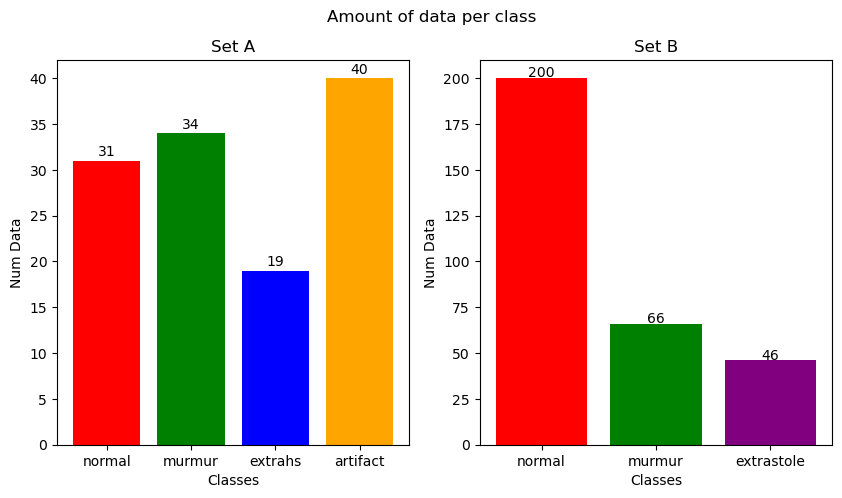

In [7]:
#@title Data distribution of each dataset
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Amount of data per class')
# Bar Graph Dataset A
axs[0].bar(['normal', 'murmur', 'extrahs', 'artifact'], [num_normal_a, num_murmur_a, num_extrahs, num_artifact], color=['red', 'green', 'blue', 'orange']
)
for i, v in enumerate([num_normal_a, num_murmur_a, num_extrahs, num_artifact]):
    axs[0].text(i, v + 0.5, str(v), color='black', ha='center')
# Set title subplot A
axs[0].set_title('Set A')
# Set labels subplot A
axs[0].set(xlabel='Classes', ylabel='Num Data')
# Bar Graph Dataset B
axs[1].bar(['normal', 'murmur', 'extrastole'], [num_normal_b, num_murmur_b, num_extrastole], color=['red', 'green', 'purple']
)
for i, v in enumerate([num_normal_b, num_murmur_b, num_extrastole]):
    axs[1].text(i, v + 0.5, str(v), color='black', ha='center')

axs[1].set_title('Set B')
axs[1].set(xlabel='Classes', ylabel='Num Data')
plt.show()

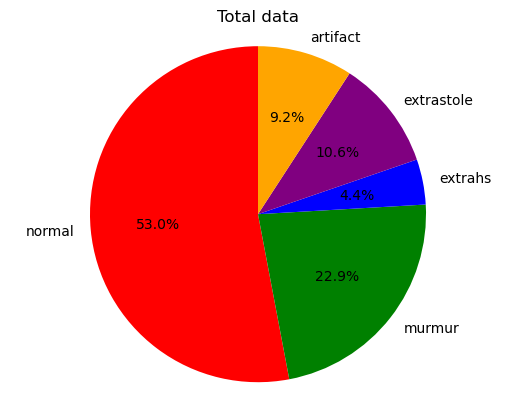

In [8]:
#@title Total Data
num_normal = num_normal_a + num_normal_b
num_murmur = num_murmur_a + num_murmur_b

num_classes = [num_normal, num_murmur, num_extrahs, num_extrastole, num_artifact]
tags = ['normal', 'murmur', 'extrahs', 'extrastole', 'artifact']

# Pie diagram
plt.pie(num_classes, labels=tags, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'purple', 'orange'])
plt.axis('equal')
plt.title('Total data')
plt.show()

#### Dataset A


##### Normal Sound (normal)


In [9]:
#@title Normal Heartbeat Sound
idx = random.randint(0, len(normal_a_data)-1)
rnd_normal_a = normal_a_data[idx]
rnd_normal_a_sr = normal_a_sr[idx]
# play audio
Audio(rnd_normal_a, rate=rnd_normal_a_sr)

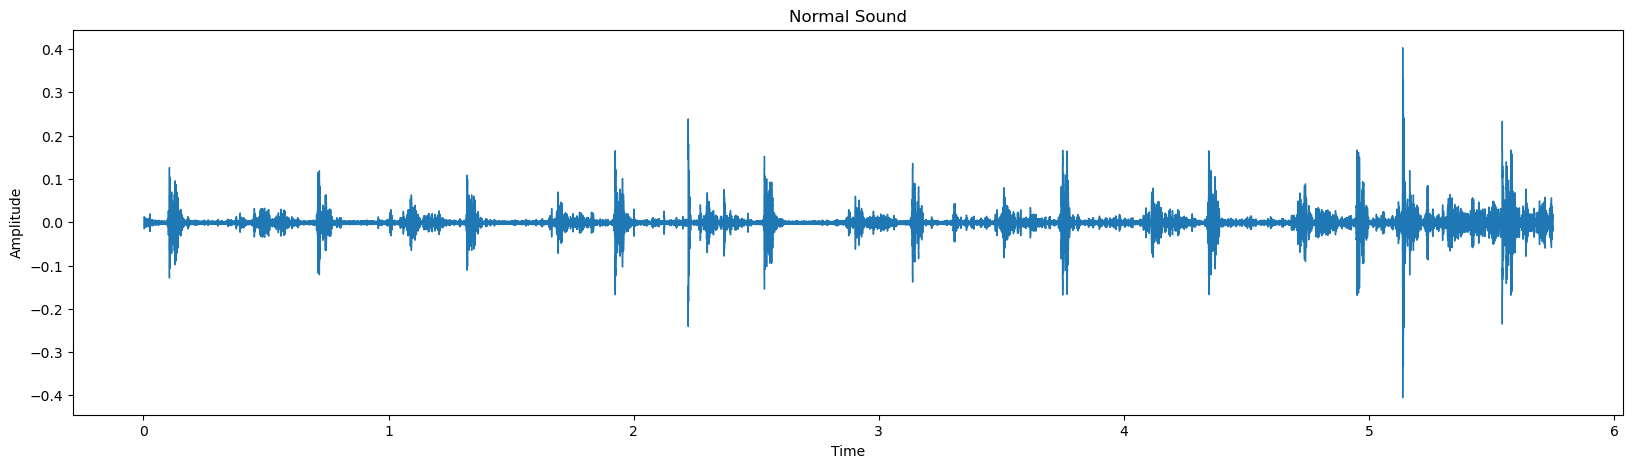

In [10]:
#@title Normal Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(rnd_normal_a, sr=rnd_normal_a_sr)
plt.title("Normal Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

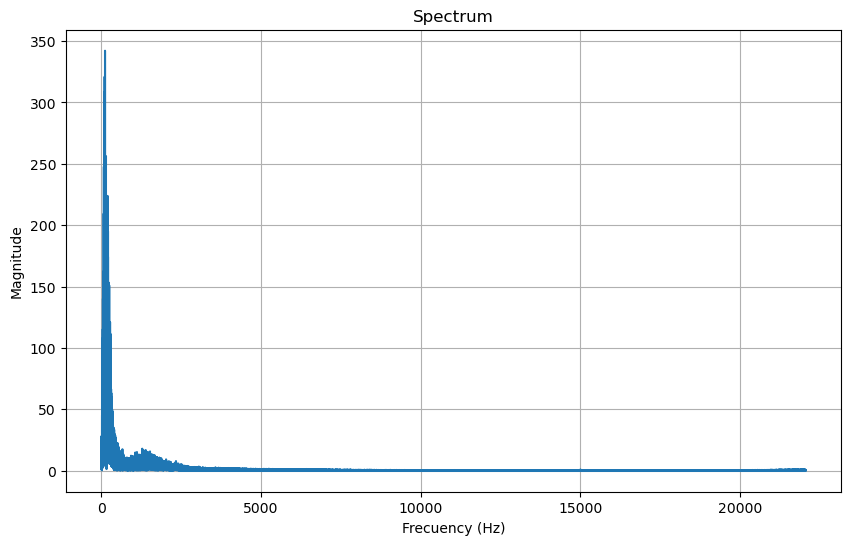

Dominant Frecuency: 121.92794938945508 Hz


In [66]:
#@title Normal Sound Spectrum
frequencies, magnitudes, dominant_frequency = get_spectrum(rnd_normal_a, rnd_normal_a_sr)

# Plot frecuency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitudes)
plt.xlabel('Frecuency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum')
plt.grid(True)
plt.show()

print('Dominant Frecuency:', dominant_frequency, 'Hz')

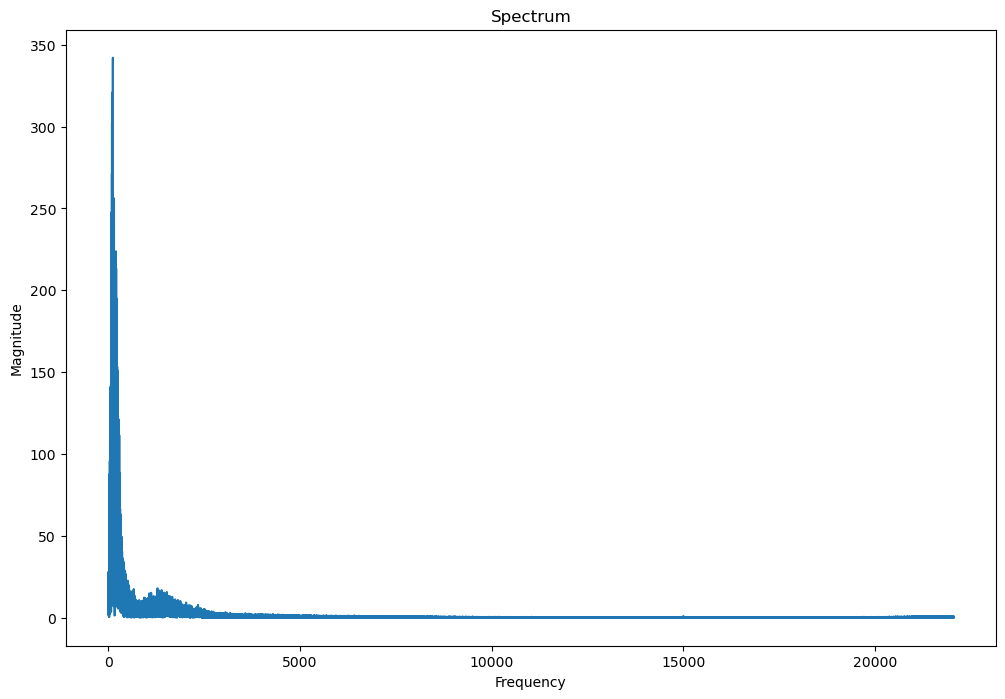

Dominant Frecuency: 121.92843028598698 Hz


In [65]:
fft_normal = np.fft.fft(rnd_normal_a)
magnitude_normal = np.abs(fft_normal)
freq_normal = np.linspace(0,rnd_normal_a_sr, len(magnitude_normal)) 
half_freq = freq_normal[:int(len(freq_normal)/2)]
half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.title("Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

print('Dominant Frecuency:', half_freq[np.argmax(half_magnitude)], 'Hz')

##### Murmur Sound (murmur)


In [60]:
#@title Murmur Heartbeat Sound
idx = random.randint(0, len(murmur_a_data)-1)
rnd_murmur_a = murmur_a_data[idx]
rnd_murmur_a_sr = murmur_a_sr[idx]
# play audio
Audio(rnd_murmur_a, rate=rnd_murmur_a_sr)

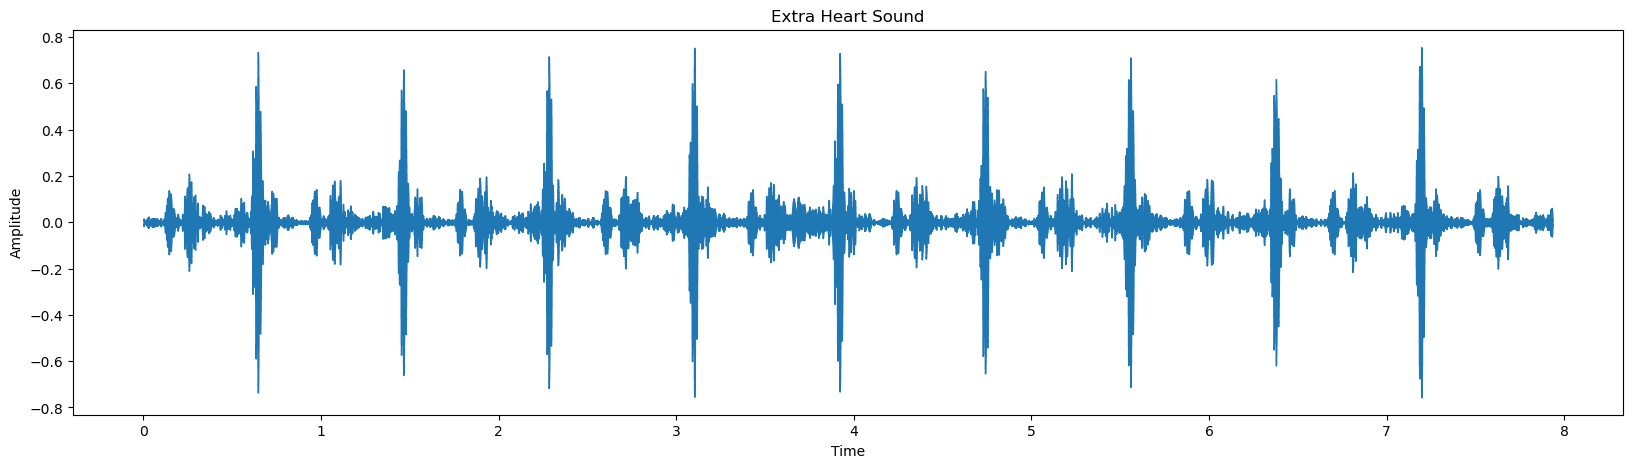

In [61]:
#@title Murmur Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(rnd_murmur_a, sr=rnd_murmur_a_sr)
plt.title("Extra Heart Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

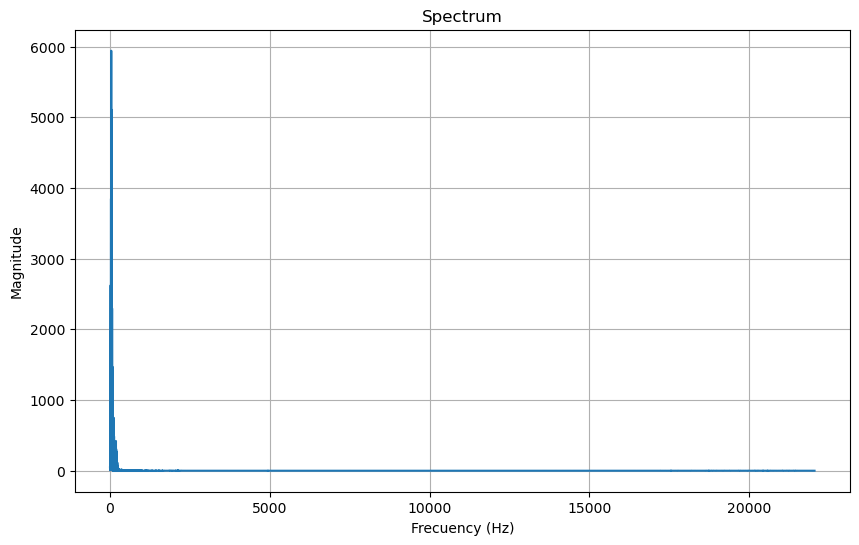

Dominant Frecuency: 39.0646877625315 Hz


In [62]:
#@title Murmur Sound Spectrum
frequencies, magnitudes, dominant_frequency = get_spectrum(rnd_murmur_a, rnd_murmur_a_sr)

# Plot frecuency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitudes)
plt.xlabel('Frecuency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum')
plt.grid(True)
plt.show()

print('Dominant Frecuency:', dominant_frequency, 'Hz')

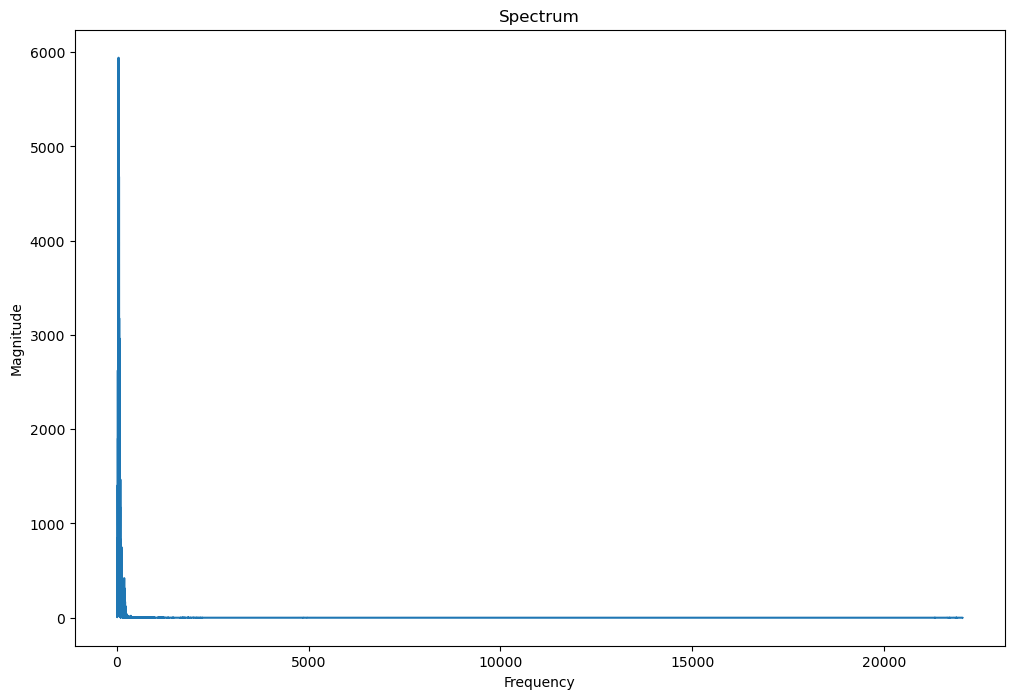

Dominant Frecuency: 39.0647993896393 Hz


In [68]:
fft_normal = np.fft.fft(rnd_murmur_a)
magnitude_normal = np.abs(fft_normal)
freq_normal = np.linspace(0,rnd_murmur_a_sr, len(magnitude_normal)) 
half_freq2 = freq_normal[:int(len(freq_normal)/2)]
half_magnitude2 = magnitude_normal[:int(len(freq_normal)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq2,half_magnitude2)
plt.title("Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

print('Dominant Frecuency:', half_freq[np.argmax(half_magnitude2)], 'Hz')

##### Extra Heart Sound (extrahs)


In [13]:
#@title Extra Heart Sound
idx = random.randint(0, len(extrahs_data)-1)
rnd_extrahs = extrahs_data[idx]
rnd_extrahs_sr = extrahs_sr[idx]
# play audio
Audio(rnd_extrahs, rate=rnd_extrahs_sr)

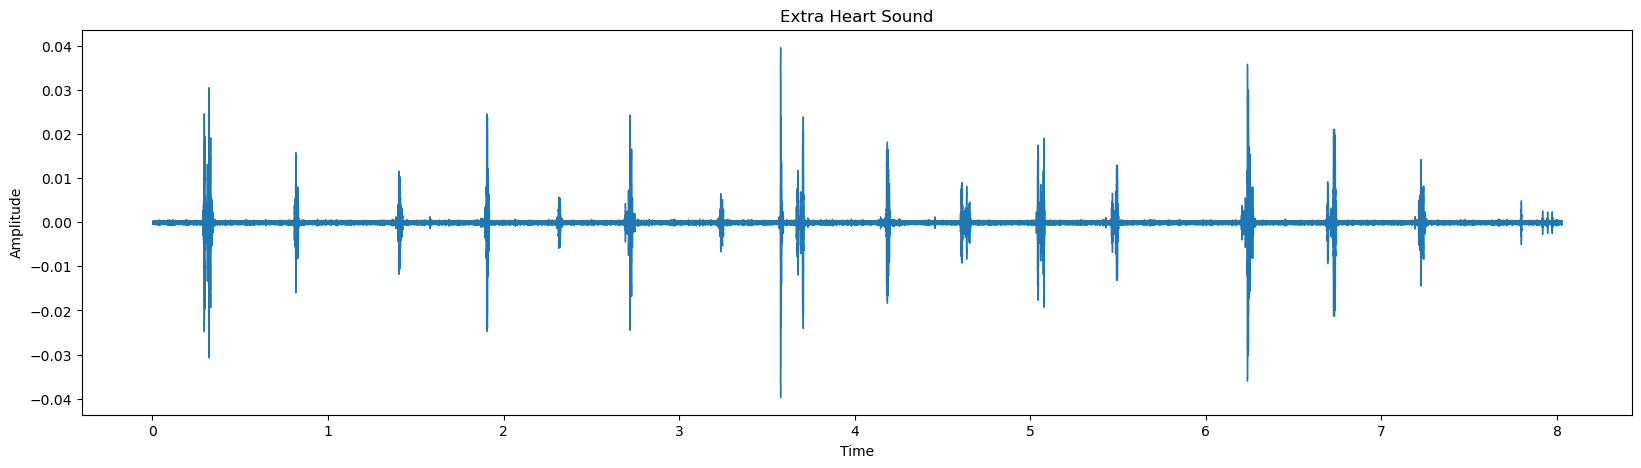

In [14]:
#@title Extra Heart Sound Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(rnd_extrahs, sr=rnd_extrahs_sr)
plt.title("Extra Heart Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

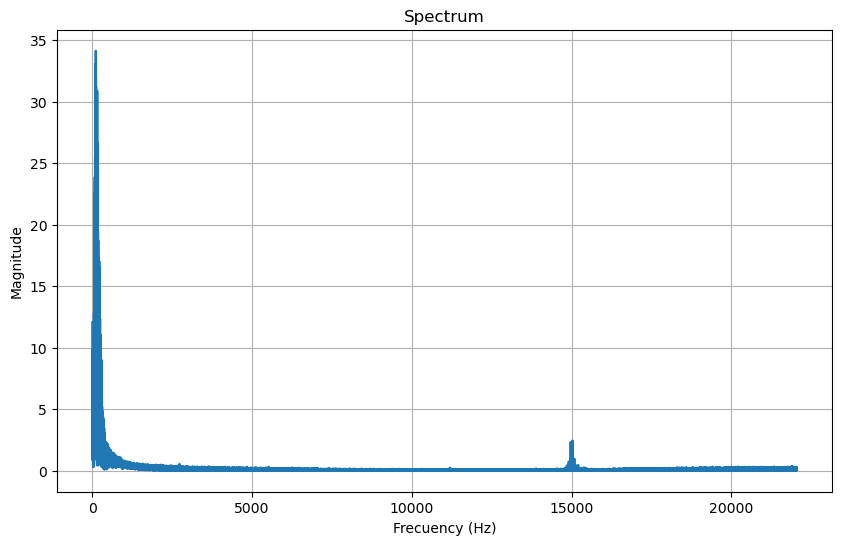

Dominant Frecuency: 108.02166383202338 Hz


In [70]:
#@title Extra Heart Sound Spectrum
frequencies, magnitudes, dominant_frequency = get_spectrum(rnd_extrahs, rnd_extrahs_sr)

# Plot frecuency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitudes)
plt.xlabel('Frecuency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum')
plt.grid(True)
plt.show()

print('Dominant Frecuency:', dominant_frequency, 'Hz')

##### Artifact Sound (artifact)


In [15]:
#@title Artifact sound
idx = random.randint(0, len(artifact_data)-1)
rnd_artifact = artifact_data[idx]
rnd_artifact_sr = artifact_sr[idx]
# play audio
Audio(rnd_artifact, rate=rnd_artifact_sr)

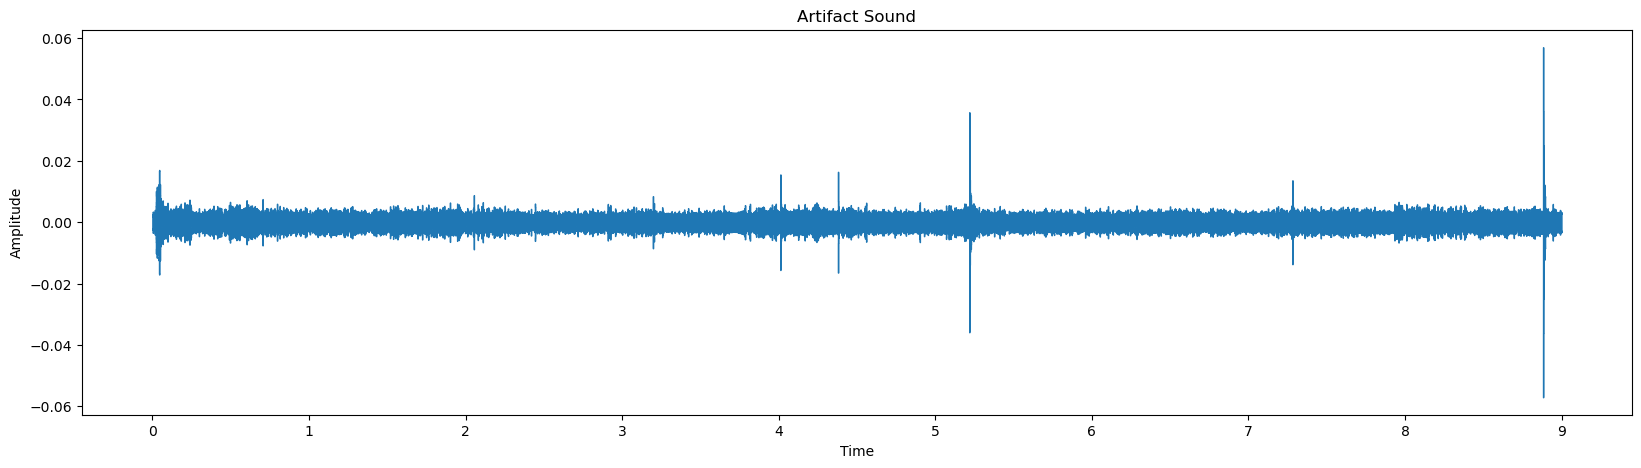

In [16]:
#@title Artifact Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(rnd_artifact, sr=rnd_artifact_sr)
plt.title("Artifact Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

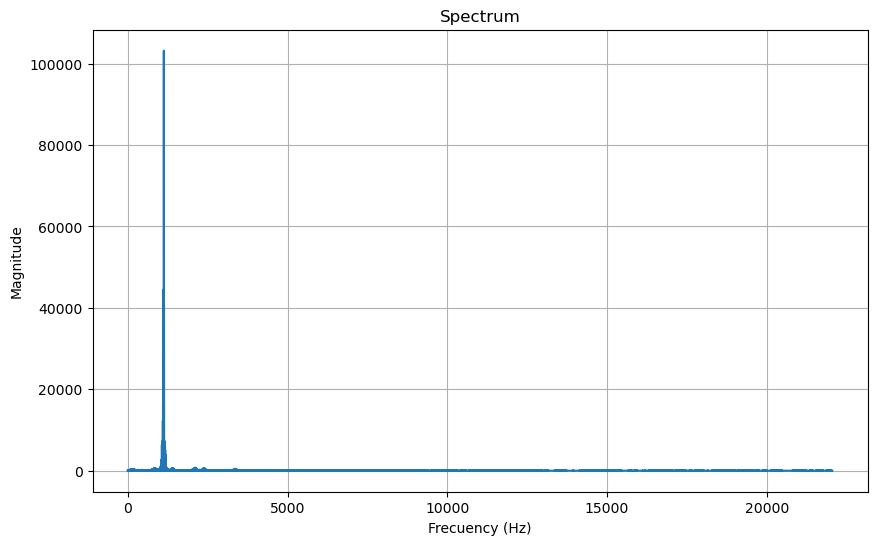

Dominant Frecuency: 1129.3333333333333 Hz


In [72]:
#@title Artifact Sound Spectrum
frequencies, magnitudes, dominant_frequency = get_spectrum(rnd_artifact, rnd_artifact_sr)

# Plot frecuency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitudes)
plt.xlabel('Frecuency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum')
plt.grid(True)
plt.show()

print('Dominant Frecuency:', dominant_frequency, 'Hz')

#### Dataset B


##### Normal Sound (normal)


In [16]:
#@title Normal Heartbeat
idx = random.randint(0, len(normal_b_data)-1)
rnd_normal_b = normal_b_data[idx]
rnd_normal_b_sr = normal_b_sr[idx]
# play audio
Audio(rnd_normal_b, rate=rnd_normal_b_sr)

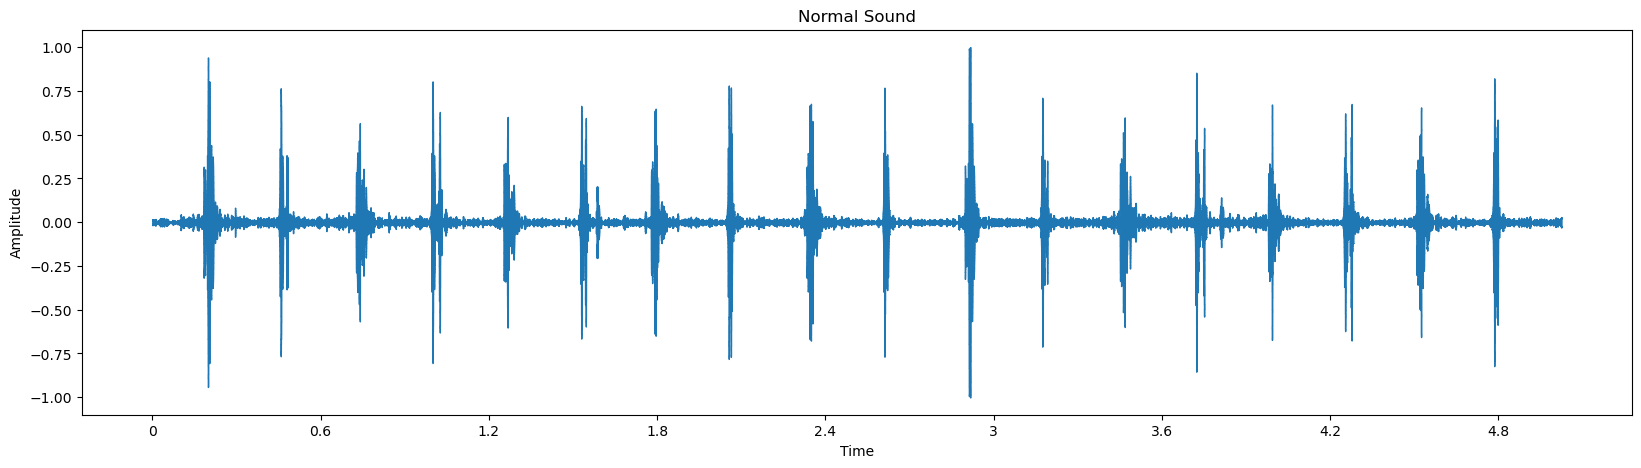

In [17]:
#@title Normal Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(rnd_normal_b, sr=rnd_normal_b_sr)
plt.title("Normal Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

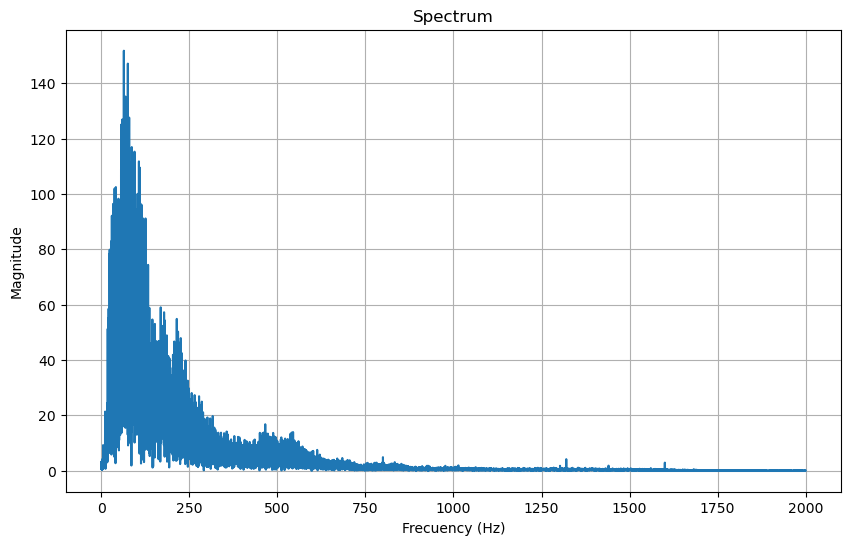

Dominant Frecuency: 64.47119689583126 Hz


In [73]:
#@title Normal Sound Spectrum
frequencies, magnitudes, dominant_frequency = get_spectrum(rnd_normal_b, rnd_normal_b_sr)

# Plot frecuency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitudes)
plt.xlabel('Frecuency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum')
plt.grid(True)
plt.show()

print('Dominant Frecuency:', dominant_frequency, 'Hz')

##### Murmur Sound (murmur)


In [18]:
#@title Murmur Heartbeat Sound
idx = random.randint(0, len(murmur_b_data)-1)
rnd_murmur_b = murmur_b_data[idx]
rnd_murmur_b_sr = murmur_b_sr[idx]
# play audio
Audio(rnd_murmur_b, rate=rnd_murmur_b_sr)

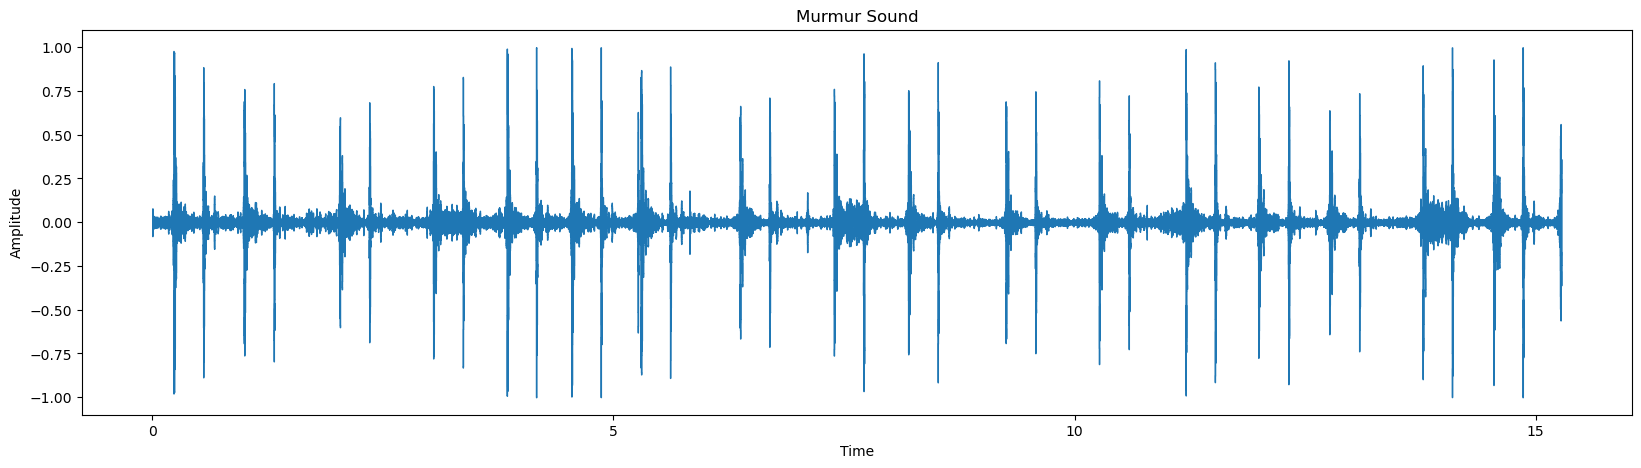

In [19]:
#@title Murmur Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(rnd_murmur_b, sr=rnd_murmur_b_sr)
plt.title("Murmur Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

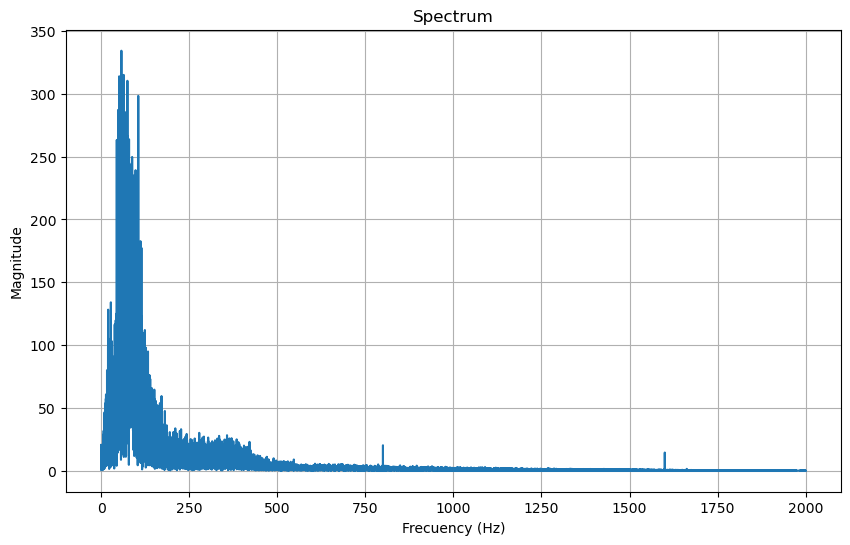

Dominant Frecuency: 57.51959036105158 Hz


In [74]:
#@title Murmur Sound Spectrum
frequencies, magnitudes, dominant_frequency = get_spectrum(rnd_murmur_b, rnd_murmur_b_sr)

# Plot frecuency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitudes)
plt.xlabel('Frecuency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum')
plt.grid(True)
plt.show()

print('Dominant Frecuency:', dominant_frequency, 'Hz')

##### Extrasystole Sound (extrastole)


In [20]:
#@title Extrasistole Heartbeat Sound
idx = random.randint(0, len(extrastole_data)-1)
rnd_extrastole = extrastole_data[idx]
rnd_extrastole_sr = extrastole_sr[idx]
# play audio
Audio(rnd_extrastole, rate=rnd_extrastole_sr)

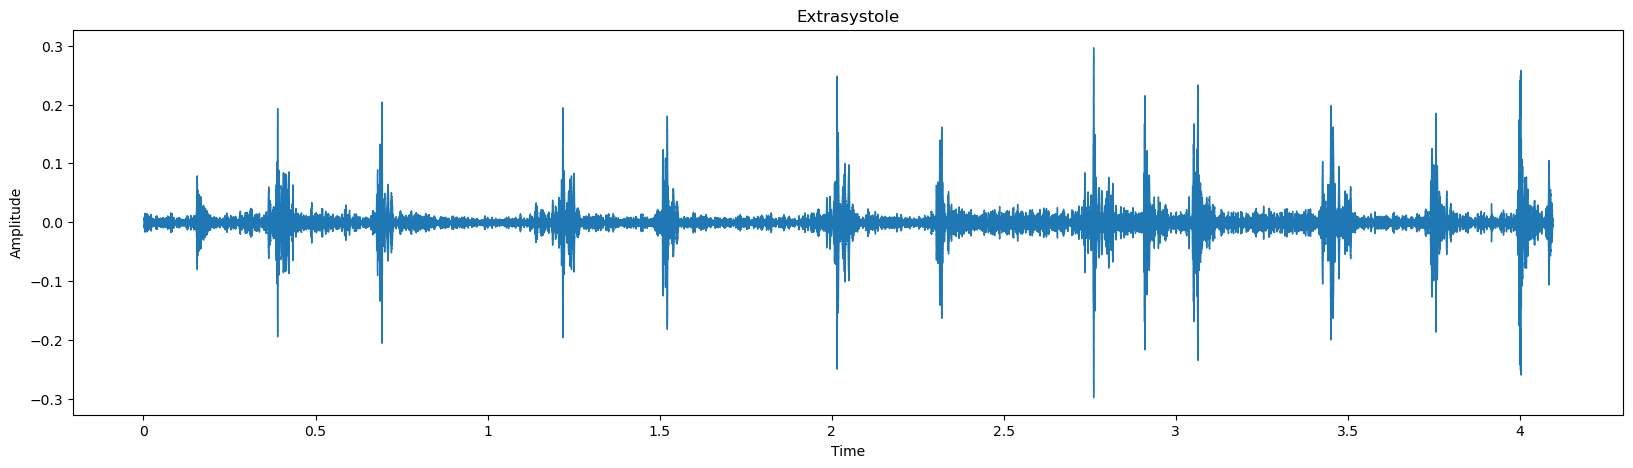

In [21]:
#@title Extrasystole Waveform
plt.figure(figsize=(20,5))
librosa.display.waveshow(rnd_extrastole, sr=rnd_extrastole_sr)
plt.title("Extrasystole")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

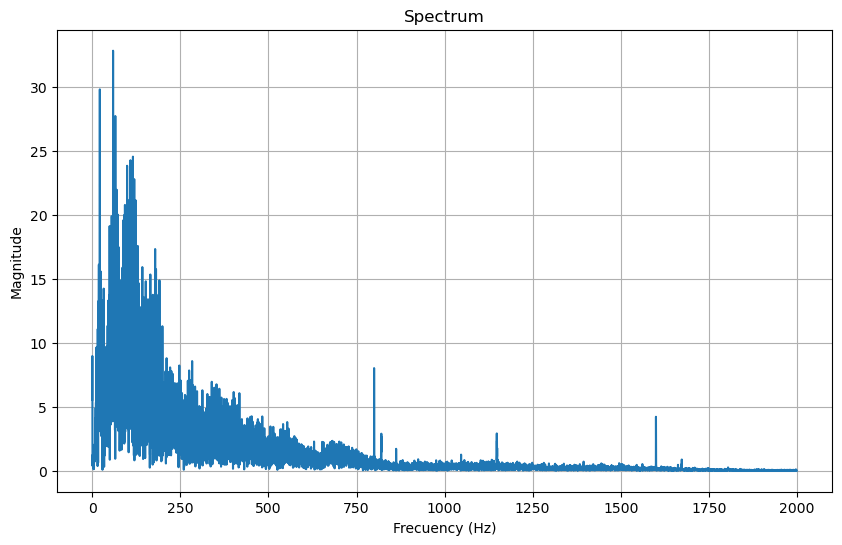

Dominant Frecuency: 59.09285147426897 Hz


In [76]:
#@title Extrasystole Sound Spectrum
frequencies, magnitudes, dominant_frequency = get_spectrum(rnd_extrastole, rnd_extrastole_sr)

# Plot frecuency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, magnitudes)
plt.xlabel('Frecuency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum')
plt.grid(True)
plt.show()

print('Dominant Frecuency:', dominant_frequency, 'Hz')

### Data Preprossecing


As it is evident, not all audio files have the same duration, which would pose the first problem. Additionally, it can also be observed that the sampling rate for audio segments in dataset A is 44100 Hz, while for dataset B it is 4000 Hz. Another important point to highlight is the class imbalance, where a higher number of data points can be noticed for the "murmur" and "normal" classes when considering all the data together.


#### Time Duration & Sample Rate


To solve the first problem, it is necessary to establish an equal time magnitude for all audio segments, which presents three cases:

- The duration is equal. No action would be taken on the audio segment.
- The duration is greater. The audio segment would need to be trimmed.
- The duration is shorter. It is necessary to fill in the missing time.

For the last two cases, the 'librosa.util.fix_length()' function can be used, as it is used to adjust the length of an audio signal based on the number of samples, rather than time. If the signal is shorter than the desired length, the function will fill the signal with repeated copies of the last value until it reaches the specified length. On the other hand, if the signal is longer than the desired length, the function will trim the signal to have the specified length.


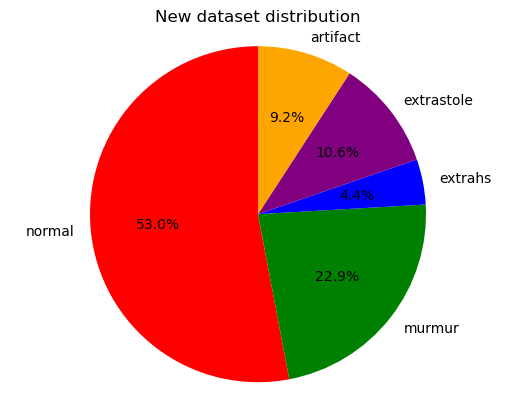

In [25]:
#@title Fix Data
time_duration = 10 #seconds
sr = 44100
fix_normal_a_data = fix_audio_length(normal_a_data, time_duration, sr)
fix_murmur_a_data = fix_audio_length(murmur_a_data, time_duration, sr)
fix_extrahs_data = fix_audio_length(extrahs_data, time_duration, sr)
fix_artifact_data = fix_audio_length(artifact_data, time_duration, sr)
fix_normal_b_data = fix_audio_length(normal_b_data, time_duration, sr)
fix_murmur_b_data = fix_audio_length(murmur_b_data, time_duration, sr)
fix_extrastole_data = fix_audio_length(extrastole_data, time_duration, sr)

fix_normal_data = fix_normal_a_data + fix_normal_b_data
normal_labels = normal_a_labels + normal_b_labels
fix_murmur_data = fix_murmur_a_data + fix_murmur_b_data
murmur_labels = murmur_a_labels + murmur_b_labels

num_normal = len(fix_normal_data)
num_murmur = len(fix_murmur_data)
num_extrahs = len(fix_extrahs_data)
num_extrastole = len(fix_extrastole_data)
num_artifact = len(fix_artifact_data)

# View new dataset
num_classes = [num_normal, num_murmur, num_extrahs, num_extrastole, num_artifact]
tags = ['normal', 'murmur', 'extrahs', 'extrastole', 'artifact']

# Pie diagram
plt.pie(num_classes, labels=tags, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'purple', 'orange'])
plt.axis('equal')
plt.title('New dataset distribution')
plt.show()

#### Class imbalance
